In [1]:
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import kmeans1d
from statsmodels.graphics.mosaicplot import mosaic
from itertools import product

In [2]:
def kWh_to_kBTu(electricity):
    "Converts kilowatt-hours(kWh) to kilobtus(kBtu)"
    return electricity*3.4121


def therms_to_kBTu(gas):
    "Converts therms(thm) to kilobtus(kBtu)"
    return gas*99.976


def gallons_to_kBtu(oil):
    "Converts gallons to kilobtus(kBtu)"
    return oil*139


def eui(E, G, O, GSF):
    """
    Calculates energy use intensity given energy uses and building gross square footage. 
    : param E - electricity use in kBtu
    : param G - gas use in kBtu
    : param O - natural oil use in kBtu
    : param GSF - building gross square footage
    """
    annual_energy_use = E + G + O
    return annual_energy_use/GSF

def multiply(x,y):
    x=x.tolist()
    for i in range(len(x)):
        x[i]=x[i]*y
    return x

In [3]:
# Read the CSV file into a pandas dataframe, skipping the first row (header)
residential = pd.read_csv('residential.csv', skiprows=[0])
residential

,Building Code,Address,Property Type,E (kWh),G(therms),O(gallon),Building Gross Footage
0,500,10 Buick Street,Residential,13205241.58,1658548.0,253894.7,384941.16
1,506,112 BAY STATE ROAD,Residential,15476.00,852.0,2571.7,4961.74
2,508,183 BAY STATE ROAD,Residential,21382.00,7269.0,0.0,8621.75
3,509,610 BEACON STREET,Residential,1201216.00,4408.0,99773.0,203525.46
4,510,68-70 BAY STATE ROAD,Residential,18803.00,0.0,0.0,11906.90
...,...,...,...,...,...,...,...
156,845,27 ABERDEEN STREET,Residential,29920.67,9305.0,0.0,8248.13
157,847,NaN,Residential,35793.09,22306.0,0.0,NaN
158,848,853 BEACON STREET,Residential,10286.17,0.0,3928.2,6477.41
159,849,875 BEACON STREET,Residential,4897.00,647.0,0.0,6814.93


In [4]:
# Read the CSV file into a pandas dataframe, skipping the first row (header)
residential = pd.read_csv('residential.csv', skiprows=[0])

# Select columns 4, 5, 6, and 7 and store them in separate lists
electricity = multiply(residential["E (kWh)"],3.4121)
gas = multiply(residential["G(therms)"],99.976)
oil = multiply(residential["O(gallon)"],139)
gsf = multiply(residential["Building Gross Footage"],1)
eui_list = []

for i in range(0, len(electricity)):
    E = electricity[i]
    G = gas[i]
    O = oil[i]
    GSF = gsf[i]
    eui_list.append(eui(E, G, O, GSF))

residential["EUI"]=pd.DataFrame(eui_list)
residential

,Building Code,Address,Property Type,E (kWh),G(therms),O(gallon),Building Gross Footage,EUI
0,500,10 Buick Street,Residential,13205241.58,1658548.0,253894.7,384941.16,639.484650
1,506,112 BAY STATE ROAD,Residential,15476.00,852.0,2571.7,4961.74,99.854388
2,508,183 BAY STATE ROAD,Residential,21382.00,7269.0,0.0,8621.75,92.751827
3,509,610 BEACON STREET,Residential,1201216.00,4408.0,99773.0,203525.46,90.444755
4,510,68-70 BAY STATE ROAD,Residential,18803.00,0.0,0.0,11906.90,5.388280
...,...,...,...,...,...,...,...,...
156,845,27 ABERDEEN STREET,Residential,29920.67,9305.0,0.0,8248.13,125.164007
157,847,NaN,Residential,35793.09,22306.0,0.0,NaN,NaN
158,848,853 BEACON STREET,Residential,10286.17,0.0,3928.2,6477.41,89.714445
159,849,875 BEACON STREET,Residential,4897.00,647.0,0.0,6814.93,11.943413


In [5]:
# Read the CSV file into a pandas dataframe, skipping the first row (header)
research = pd.read_csv('research.csv', skiprows=[0])

# Select columns 4, 5, 6, and 7 and store them in separate lists
electricity = multiply(research["E"],3.4121)
gas = multiply(research["G"],99.976)
oil = multiply(research["O"],139)
gsf = multiply(research["Building Gross Footage"],1)
eui_list = []

for i in range(0, len(electricity)):
    E = electricity[i]
    G = gas[i]
    O = oil[i]
    GSF = gsf[i]
    eui_list.append(eui(E, G, O, GSF))

research["EUI"]=pd.DataFrame(eui_list)
research

,Building Code,Address,Property Type,E,G,O,Building Gross Footage,EUI
0,581,2 Cummington Mall,Research,1486320.0,42183.0,0.0,59825.75,155.263579
1,582,30-38 Cummington Street,Research,1309308.0,43468.0,5531.0,36466.44,262.763670
2,587,42-44 Cummington Street,Research,3800070.0,106247.0,0.0,101335.67,232.774589
3,595,3-5 Cummington Street (616-620 Comm. Ave.),Research,3957840.0,139459.0,0.0,152457.33,180.031349
4,597,631-639 Commonwealth Avenue,Research,1588680.0,39331.0,190.4,100339.72,93.476010
5,605,111 Cummington Street (664-666 Comm. Ave),Research,3290340.0,1471.0,0.0,92270.64,123.268179
6,643,20-28 Cummington Street (24 Cummington St),Research,10906560.0,295343.0,63683.9,191654.13,394.426915
7,647,582-596 Commonwealth Avenue (590 Comm / 712 Bea),Research,9402240.0,10367.0,185340.1,287433.03,204.848093
8,649,677 Beacon Street,Research,832200.0,12289.0,0.0,26259.98,154.918423
9,650,48-52 Cummington Mall,Research,406000.0,0.0,9075.7,17089.16,154.883850


In [6]:
# Read the CSV file into a pandas dataframe, skipping the first row (header)
concat = pd.read_csv('concat_data.csv')

# Select columns 4, 5, 6, and 7 and store them in separate lists
electricity = multiply(concat["E (kWh)"],3.4121)
gas = multiply(concat["G(therms)"],99.976)
oil = multiply(concat["O(gallon)"],139)
gsf = multiply(concat["Building Gross Footage"],1)
eui_list = []

for i in range(0, len(electricity)):
    E = electricity[i]
    G = gas[i]
    O = oil[i]
    GSF = gsf[i]
    eui_list.append(eui(E, G, O, GSF))

concat["EUI"]=pd.DataFrame(eui_list)
concat=concat.dropna()
concat

,Building Code,Address,Property Type,E (kWh),G(therms),O(gallon),Building Gross Footage,EUI
0,500,10 Buick Street,Residential,13205241.58,1658548.0,253894.7,384941.16,639.484650
1,506,112 BAY STATE ROAD,Residential,15476.00,852.0,2571.7,4961.74,99.854388
2,508,183 BAY STATE ROAD,Residential,21382.00,7269.0,0.0,8621.75,92.751827
3,509,610 BEACON STREET,Residential,1201216.00,4408.0,99773.0,203525.46,90.444755
4,510,68-70 BAY STATE ROAD,Residential,18803.00,0.0,0.0,11906.90,5.388280
...,...,...,...,...,...,...,...,...
167,643,20-28 Cummington Street (24 Cummington St),Research,10906560.00,295343.0,63683.9,191654.13,394.426915
168,647,582-596 Commonwealth Avenue (590 Comm / 712 Bea),Research,9402240.00,10367.0,185340.1,287433.03,204.848093
169,649,677 Beacon Street,Research,832200.00,12289.0,0.0,26259.98,154.918423
170,650,48-52 Cummington Mall,Research,406000.00,0.0,9075.7,17089.16,154.883850


In [7]:
concat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 158 entries, 0 to 171
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Building Code           158 non-null    int64  
 1   Address                 158 non-null    object 
 2   Property Type           158 non-null    object 
 3   E (kWh)                 158 non-null    float64
 4   G(therms)               158 non-null    float64
 5   O(gallon)               158 non-null    float64
 6   Building Gross Footage  158 non-null    float64
 7   EUI                     158 non-null    float64
dtypes: float64(5), int64(1), object(2)
memory usage: 11.1+ KB


In [8]:
# 1d k means
clusters, centroids = kmeans1d.cluster(concat.EUI.to_list(), 2)
print(clusters)   
print(centroids)

[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1]
[83.69269696756349, 320.67741012639453]


In [9]:
concat=concat.reset_index(drop=True)
concat

,Building Code,Address,Property Type,E (kWh),G(therms),O(gallon),Building Gross Footage,EUI
0,500,10 Buick Street,Residential,13205241.58,1658548.0,253894.7,384941.16,639.484650
1,506,112 BAY STATE ROAD,Residential,15476.00,852.0,2571.7,4961.74,99.854388
2,508,183 BAY STATE ROAD,Residential,21382.00,7269.0,0.0,8621.75,92.751827
3,509,610 BEACON STREET,Residential,1201216.00,4408.0,99773.0,203525.46,90.444755
4,510,68-70 BAY STATE ROAD,Residential,18803.00,0.0,0.0,11906.90,5.388280
...,...,...,...,...,...,...,...,...
153,643,20-28 Cummington Street (24 Cummington St),Research,10906560.00,295343.0,63683.9,191654.13,394.426915
154,647,582-596 Commonwealth Avenue (590 Comm / 712 Bea),Research,9402240.00,10367.0,185340.1,287433.03,204.848093
155,649,677 Beacon Street,Research,832200.00,12289.0,0.0,26259.98,154.918423
156,650,48-52 Cummington Mall,Research,406000.00,0.0,9075.7,17089.16,154.883850


In [10]:
concat["cluster"]=pd.DataFrame(clusters)
concat

,Building Code,Address,Property Type,E (kWh),G(therms),O(gallon),Building Gross Footage,EUI,cluster
0,500,10 Buick Street,Residential,13205241.58,1658548.0,253894.7,384941.16,639.484650,1
1,506,112 BAY STATE ROAD,Residential,15476.00,852.0,2571.7,4961.74,99.854388,0
2,508,183 BAY STATE ROAD,Residential,21382.00,7269.0,0.0,8621.75,92.751827,0
3,509,610 BEACON STREET,Residential,1201216.00,4408.0,99773.0,203525.46,90.444755,0
4,510,68-70 BAY STATE ROAD,Residential,18803.00,0.0,0.0,11906.90,5.388280,0
...,...,...,...,...,...,...,...,...,...
153,643,20-28 Cummington Street (24 Cummington St),Research,10906560.00,295343.0,63683.9,191654.13,394.426915,1
154,647,582-596 Commonwealth Avenue (590 Comm / 712 Bea),Research,9402240.00,10367.0,185340.1,287433.03,204.848093,1
155,649,677 Beacon Street,Research,832200.00,12289.0,0.0,26259.98,154.918423,0
156,650,48-52 Cummington Mall,Research,406000.00,0.0,9075.7,17089.16,154.883850,0


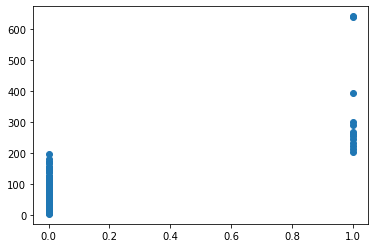

In [11]:
plt.scatter(concat.cluster,concat.EUI)

In [12]:
concat.cluster=concat.cluster.replace(0,"low")
concat.cluster=concat.cluster.replace(1,"high")

In [13]:
crosstable=pd.crosstab(concat['Property Type'],concat['cluster'])
crosstable

cluster,high,low
Property Type,,
Research,5,6
Residential,8,139


(<Figure size 432x288 with 3 Axes>,
 {('Residential', 'high'): (0.0, 0.0, 0.9257509918760628, 0.0542409654891857),
  ('Residential', 'low'): (0.0,
   0.057563224625398327,
   0.9257509918760628,
   0.9424367753746017),
  ('Research', 'high'): (0.9307261162541722,
   0.0,
   0.06927388374582787,
   0.45303533675626695),
  ('Research', 'low'): (0.9307261162541722,
   0.4563575958924796,
   0.06927388374582787,
   0.5436424041075203)})

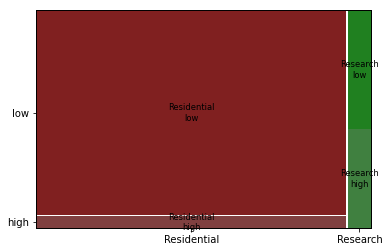

In [14]:
mosaic(concat, ['Property Type', 'cluster'])

(<Figure size 432x288 with 3 Axes>,
 {('Residential', 'high'): (0.0, 0.0, 0.9257509918760628, 0.0542409654891857),
  ('Residential', 'low'): (0.0,
   0.057563224625398327,
   0.9257509918760628,
   0.9424367753746017),
  ('Research', 'high'): (0.9307261162541722,
   0.0,
   0.06927388374582787,
   0.45303533675626695),
  ('Research', 'low'): (0.9307261162541722,
   0.4563575958924796,
   0.06927388374582787,
   0.5436424041075203)})

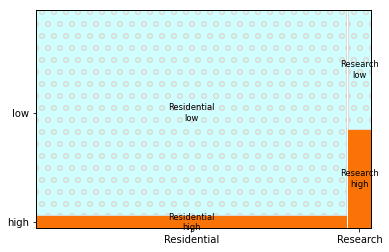

In [15]:
props = {}
props[('Research', 'high')] = {'color': 'xkcd:orange'}
props[('Research','low')] = {'facecolor': 'xkcd:pale blue',
                       'edgecolor':'xkcd:light grey',
                       'hatch':'o'}
props[('Residential', 'high')] = {'color': 'xkcd:orange'}
props[('Residential','low')] = {'facecolor': 'xkcd:pale blue',
                       'edgecolor':'xkcd:light grey',
                       'hatch':'o'}
mosaic(concat, ['Property Type', 'cluster'],properties=props)

In [16]:
#Use decision tree to find importance for futureing scroding freatures
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

In [17]:
# Read the CSV file into a pandas dataframe, skipping the first row (header)
knn = pd.read_csv('KNN_data.csv')
knn

,Building Code,Property Type,distance_from_GSU,year_built,Stories,Height,E (kWh),G(therms),O(gallon),Building Gross Footage
0,500,Residential,3.478657,2000.0,19,195.0,13205241.58,1658548.0,253894.7,384941.16
1,506,Residential,3.478657,1910.0,5,44.0,15476.00,852.0,2571.7,4961.74
2,535,Residential,3.478657,1910.0,5,44.0,83808.00,9248.0,0.0,4951.86
3,508,Residential,3.478657,1901.0,5,40.0,21382.00,7269.0,0.0,8621.75
4,509,Residential,3.478657,1926.0,10,80.0,1201216.00,4408.0,99773.0,203525.46
...,...,...,...,...,...,...,...,...,...,...
120,835,Residential,3.478657,1894.0,5,48.0,9192.00,0.0,2819.5,6754.43
121,837,Residential,3.478657,1893.0,5,48.0,8640.00,0.0,4953.7,7759.97
122,649,Research,3.478657,1893.0,5,48.0,832200.00,12289.0,0.0,26259.98
123,848,Residential,3.478657,1894.0,5,51.0,10286.17,0.0,3928.2,6477.41


In [18]:
knn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Building Code           125 non-null    int64  
 1   Property Type           125 non-null    object 
 2   distance_from_GSU       125 non-null    float64
 3   year_built              125 non-null    float64
 4   Stories                 125 non-null    int64  
 5   Height                  125 non-null    float64
 6   E (kWh)                 125 non-null    float64
 7   G(therms)               125 non-null    float64
 8   O(gallon)               125 non-null    float64
 9   Building Gross Footage  125 non-null    float64
dtypes: float64(7), int64(2), object(1)
memory usage: 9.9+ KB


In [19]:
# Select columns 4, 5, 6, and 7 and store them in separate lists
electricity = multiply(knn["E (kWh)"],3.4121)
gas = multiply(knn["G(therms)"],99.976)
oil = multiply(knn["O(gallon)"],139)
gsf = multiply(knn["Building Gross Footage"],1)
eui_list = []

for i in range(0, len(electricity)):
    E = electricity[i]
    G = gas[i]
    O = oil[i]
    GSF = gsf[i]
    eui_list.append(eui(E, G, O, GSF))

knn["EUI"]=pd.DataFrame(eui_list)
knn=knn.dropna()
knn

,Building Code,Property Type,distance_from_GSU,year_built,Stories,Height,E (kWh),G(therms),O(gallon),Building Gross Footage,EUI
0,500,Residential,3.478657,2000.0,19,195.0,13205241.58,1658548.0,253894.7,384941.16,639.484650
1,506,Residential,3.478657,1910.0,5,44.0,15476.00,852.0,2571.7,4961.74,99.854388
2,535,Residential,3.478657,1910.0,5,44.0,83808.00,9248.0,0.0,4951.86,244.461541
3,508,Residential,3.478657,1901.0,5,40.0,21382.00,7269.0,0.0,8621.75,92.751827
4,509,Residential,3.478657,1926.0,10,80.0,1201216.00,4408.0,99773.0,203525.46,90.444755
...,...,...,...,...,...,...,...,...,...,...,...
120,835,Residential,3.478657,1894.0,5,48.0,9192.00,0.0,2819.5,6754.43,62.666209
121,837,Residential,3.478657,1893.0,5,48.0,8640.00,0.0,4953.7,7759.97,92.531910
122,649,Research,3.478657,1893.0,5,48.0,832200.00,12289.0,0.0,26259.98,154.918423
123,848,Residential,3.478657,1894.0,5,51.0,10286.17,0.0,3928.2,6477.41,89.714445


In [20]:
knn["Property Type"]=knn["Property Type"].replace("Residential",0)
knn["Property Type"]=knn["Property Type"].replace("Research",1)
knn

,Building Code,Property Type,distance_from_GSU,year_built,Stories,Height,E (kWh),G(therms),O(gallon),Building Gross Footage,EUI
0,500,0,3.478657,2000.0,19,195.0,13205241.58,1658548.0,253894.7,384941.16,639.484650
1,506,0,3.478657,1910.0,5,44.0,15476.00,852.0,2571.7,4961.74,99.854388
2,535,0,3.478657,1910.0,5,44.0,83808.00,9248.0,0.0,4951.86,244.461541
3,508,0,3.478657,1901.0,5,40.0,21382.00,7269.0,0.0,8621.75,92.751827
4,509,0,3.478657,1926.0,10,80.0,1201216.00,4408.0,99773.0,203525.46,90.444755
...,...,...,...,...,...,...,...,...,...,...,...
120,835,0,3.478657,1894.0,5,48.0,9192.00,0.0,2819.5,6754.43,62.666209
121,837,0,3.478657,1893.0,5,48.0,8640.00,0.0,4953.7,7759.97,92.531910
122,649,1,3.478657,1893.0,5,48.0,832200.00,12289.0,0.0,26259.98,154.918423
123,848,0,3.478657,1894.0,5,51.0,10286.17,0.0,3928.2,6477.41,89.714445


In [21]:
knn.describe()

,Building Code,Property Type,distance_from_GSU,year_built,Stories,Height,E (kWh),G(therms),O(gallon),Building Gross Footage,EUI
count,125.00000,125.000000,1.250000e+02,125.000000,125.000000,125.000000,1.250000e+02,1.250000e+02,125.000000,125.000000,125.000000
mean,680.38400,0.008000,3.478657e+00,1902.392000,5.328000,60.912000,2.745124e+05,1.860522e+04,5584.406400,22478.703200,96.913385
std,111.90252,0.089443,2.229381e-15,16.573344,1.899813,68.256752,1.446680e+06,1.483629e+05,24993.783005,70316.851844,84.600800
min,500.00000,0.000000,3.478657e+00,1875.000000,4.000000,34.000000,0.000000e+00,0.000000e+00,0.000000,4812.380000,3.553053
25%,560.00000,0.000000,3.478657e+00,1895.000000,5.000000,43.000000,2.175100e+04,0.000000e+00,0.000000,6044.330000,64.586652
50%,710.00000,0.000000,3.478657e+00,1899.000000,5.000000,48.000000,3.274700e+04,1.068000e+03,0.000000,6954.060000,83.650160
75%,779.00000,0.000000,3.478657e+00,1902.000000,5.000000,52.000000,6.145100e+04,5.469000e+03,3399.000000,9997.920000,101.722164
max,851.00000,1.000000,3.478657e+00,2004.000000,19.000000,556.000000,1.320524e+07,1.658548e+06,253894.700000,638216.100000,642.250483


In [22]:
x=knn[[ 
       "year_built","Stories"]]
y=knn["EUI"]

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.4,random_state=1)

In [25]:
# Fit regression model
tree = DecisionTreeRegressor(max_depth=10)
tree.fit(x, y)

# Predict
# y_1 = regr_1.predict(X_test)
# y_2 = regr_2.predict(X_test)

# Extracting the importances by sklearn 
importances_sk = tree.feature_importances_

# Creating a dataframe with the feature importance by sklearn
feature_importance_sk = {}
features = x.columns.tolist()
for i, feature in enumerate(features):
    feature_importance_sk[feature] = round(importances_sk[i], 3)

print(f"Feature importance by sklearn: {feature_importance_sk}")

Feature importance by sklearn: {'year_built': 0.348, 'Stories': 0.652}


In [34]:
#SVR
import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_absolute_error

In [27]:
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
svr_lin = SVR(kernel='linear', C=1e3)
svr_poly = SVR(kernel='poly', C=1e3, degree=2)
y_rbf = svr_rbf.fit(X_train, y_train).predict(X_test)
y_lin = svr_lin.fit(x, y).predict(x)
y_poly = svr_poly.fit(x, y).predict(x)


In [28]:
# y_rbf = svr_rbf.fit(x.Stories.to_numpy().reshape(-1, 1), y).predict(np.array([4, 5, 10, 18]).reshape(-1, 1))
# y_rbf

In [29]:
# y_rbf = svr_rbf.fit(x, y).predict()

In [32]:
r2_score(y_test, y_rbf)

-0.2547302944988228

In [35]:
mean_absolute_error(y_test, y_rbf)

55.02328703721076

In [ ]:
#prediect data


In [ ]:
plt.scatter(X_test.Stories,y_test)
plt.scatter(X_test.Stories,y_rbf)

In [ ]:
plt.scatter(x.Stories,y)
plt.scatter(x.Stories,y_lin)

In [ ]:
plt.scatter(x.Stories,y)
plt.scatter(x.Stories,y_poly)